# Plot results on a specific path {#plot_on_path}

This example shows how to get a result mapped over a specific path and
how to plot it.


In [1]:
import matplotlib.pyplot as plt

from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core import operators as ops
from ansys.dpf.core.plotter import DpfPlotter

# Plot path

Use the `ansys.dpf.core.plotter.DpfPlotter`{.interpreted-text
role="class"} class to plot a mapped result over a defined path of
coordinates.


In [2]:
# Create the model and request its mesh and displacement data.
model = dpf.Model(examples.find_static_rst())
mesh = model.metadata.meshed_region
stress_fc = model.results.stress().eqv().eval()

Create a coordinates field to map on.


In [3]:
coordinates = [[0.024, 0.03, 0.003]]
delta = 0.001
n_points = 51
for i in range(1, n_points):
    coord_copy = coordinates[0].copy()
    coord_copy[1] = coord_copy[0] + i * delta
    coordinates.append(coord_copy)
field_coord = dpf.fields_factory.create_3d_vector_field(len(coordinates))
field_coord.data = coordinates
field_coord.scoping.ids = list(range(1, len(coordinates) + 1))

Compute the mapped data using the mapping operator.


In [4]:
mapping_operator = ops.mapping.on_coordinates(
    fields_container=stress_fc, coordinates=field_coord, create_support=True, mesh=mesh
)
fields_mapped = mapping_operator.outputs.fields_container()

Request the mapped field data and its mesh.


In [5]:
field_m = fields_mapped[0]
mesh_m = field_m.meshed_region

Create the plotter and add fields and meshes.


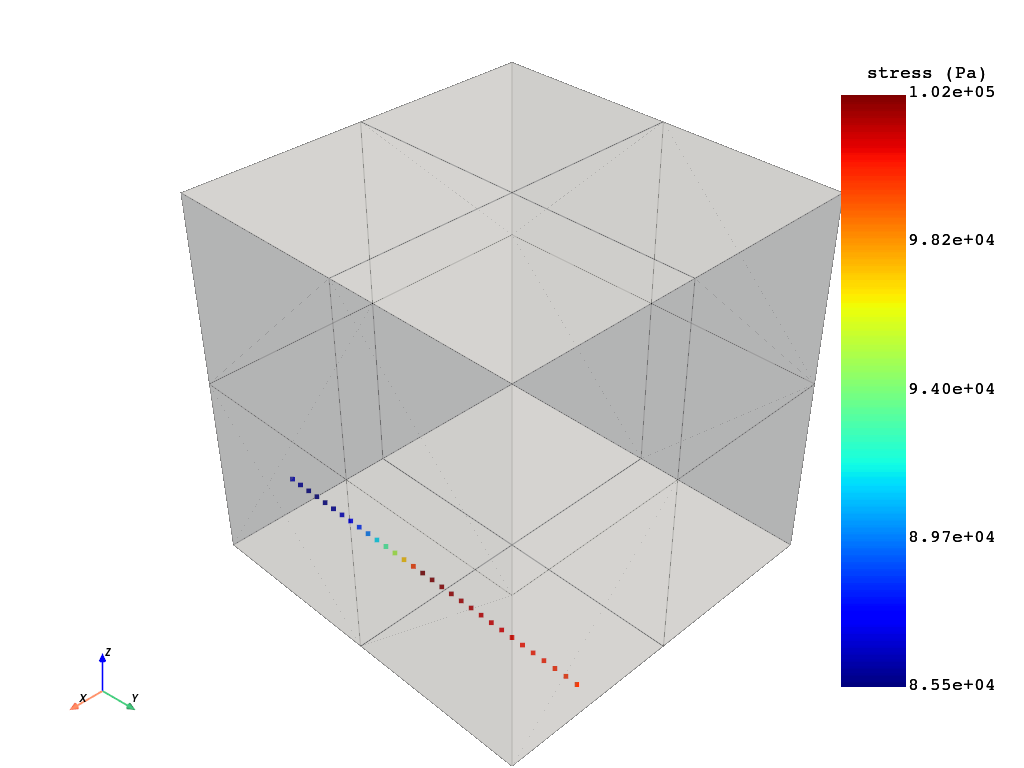

In [6]:
pl = DpfPlotter()

pl.add_field(field_m, mesh_m)
pl.add_mesh(mesh, style="surface", show_edges=True, color="w", opacity=0.3)

# Plot the result.
pl.show_figure(show_axes=True)

Plot the solution along the specified line. Note that since the line is
only moving along the y-axis, the stresses are plotted with respect to
the y coordinate.


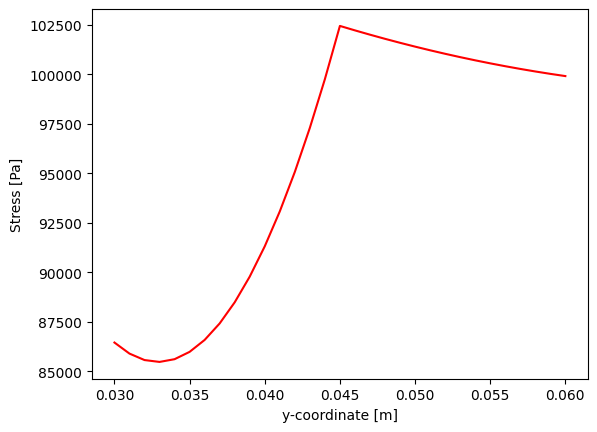

In [7]:
y_coords = [mesh_m.nodes.coordinates_field.data[i][1] for i in range(mesh_m.nodes.n_nodes)]
plt.plot(y_coords, field_m.data, "r")
plt.xlabel(f"y-coordinate [{mesh.unit}]")
plt.ylabel(f"Stress [{field_m.unit}]")
plt.show()